In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import seaborn as sns 
import csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dialect_Identification/dialect_full.csv')

In [ ]:
df

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


# **Clean the data**

In [ ]:
df1 = df.copy()
# remove mentions from text
df1['text'] = df1['text'].str.replace(r'@\w+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
# remove emojis from text
df1['text'] = df1['text'].str.replace(emoji_pattern, '')

In [ ]:
# remove digits from text
df1['text'] = df1['text'].str.replace(r'\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# remove URLs from text
df1['text'] = df1['text'].str.replace(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# remove english words
df1['text'] = df1['text'].str.replace(r'[a-zA-Z0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# replace the MSA relative pronouns ( الذي , الذى , التي , التى , الذين ) with the dialectal relative pronoun اللي
df2 = df1.copy()
pattern = '|'.join([' الذي ', ' الذى ', ' التى ', ' التي ', ' الذين '])
df2['text'] = df2['text'].str.replace(pattern, 'RELATIVE')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df2['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

we have 18 target classes

In [ ]:
df2[['dialect', 'text']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   dialect  458197 non-null  object
 1   text     458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


No null values

In [ ]:
# check for duplicates
df2.duplicated(subset=None, keep='first').sum()

0

No duplicate records

## **EDA**

In [ ]:
df2['dialect'].value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

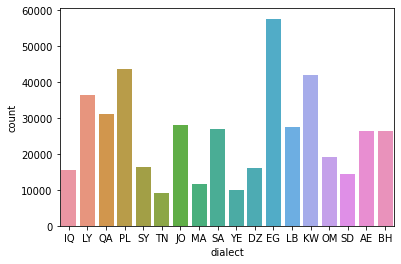

In [ ]:
_ = sns.countplot(x='dialect', data=df2)

## **Train Test Split**

In [ ]:
# select needed columns
df3 = df2[['dialect', 'text']]

# split data
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42, shuffle=True, stratify = df3['dialect'])

In [ ]:
# save train and test dataframes in csv files

train_df.to_csv('/content/drive/MyDrive/Dialect_Identification/train.csv', quoting=csv.QUOTE_NONNUMERIC, index=False)
test_df.to_csv('/content/drive/MyDrive/Dialect_Identification/test.csv', quoting=csv.QUOTE_NONNUMERIC, index=False)
